In [1]:
from ml_introvert import logger
import os 
import pandas as pd 
import numpy as np

In [2]:
os.chdir("../")
os.getcwd()

'/workspaces/Introverts_Prediction_ML_KGL'

In [3]:
from ml_introvert.constant import *

In [4]:
df = pd.read_csv(os.path.join(RAW_DATA_DIR,DATA_FILENAME))


In [5]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [6]:
df.shape

(18524, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [10]:
df.drop(columns=['id'],inplace=True)

#### fill the messing data with median and mode for the numerical and categegorical data 


In [11]:
num_feat= df.select_dtypes(include=['int','float']).columns.to_list()
cat_feat= df.select_dtypes(include=['object','category']).columns.to_list()

In [12]:
num_feat

['Time_spent_Alone',
 'Social_event_attendance',
 'Going_outside',
 'Friends_circle_size',
 'Post_frequency']

In [13]:
cat_feat

['Stage_fear', 'Drained_after_socializing', 'Personality']

In [14]:
for col in num_feat:
    assert(df[df[col]<0].shape[0]==0)


In [15]:
for col in cat_feat:
    print(col,df[col].unique())

Stage_fear ['No' 'Yes' nan]
Drained_after_socializing ['No' nan 'Yes']
Personality ['Extrovert' 'Introvert']


In [16]:
df.isna().sum()

Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [17]:
for col in cat_feat:
    df[col]=df[col].fillna(df[col].mode()[0])
for col in num_feat:
     df[col]=df[col].fillna(df[col].median())   


In [18]:
df.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

# EDA

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

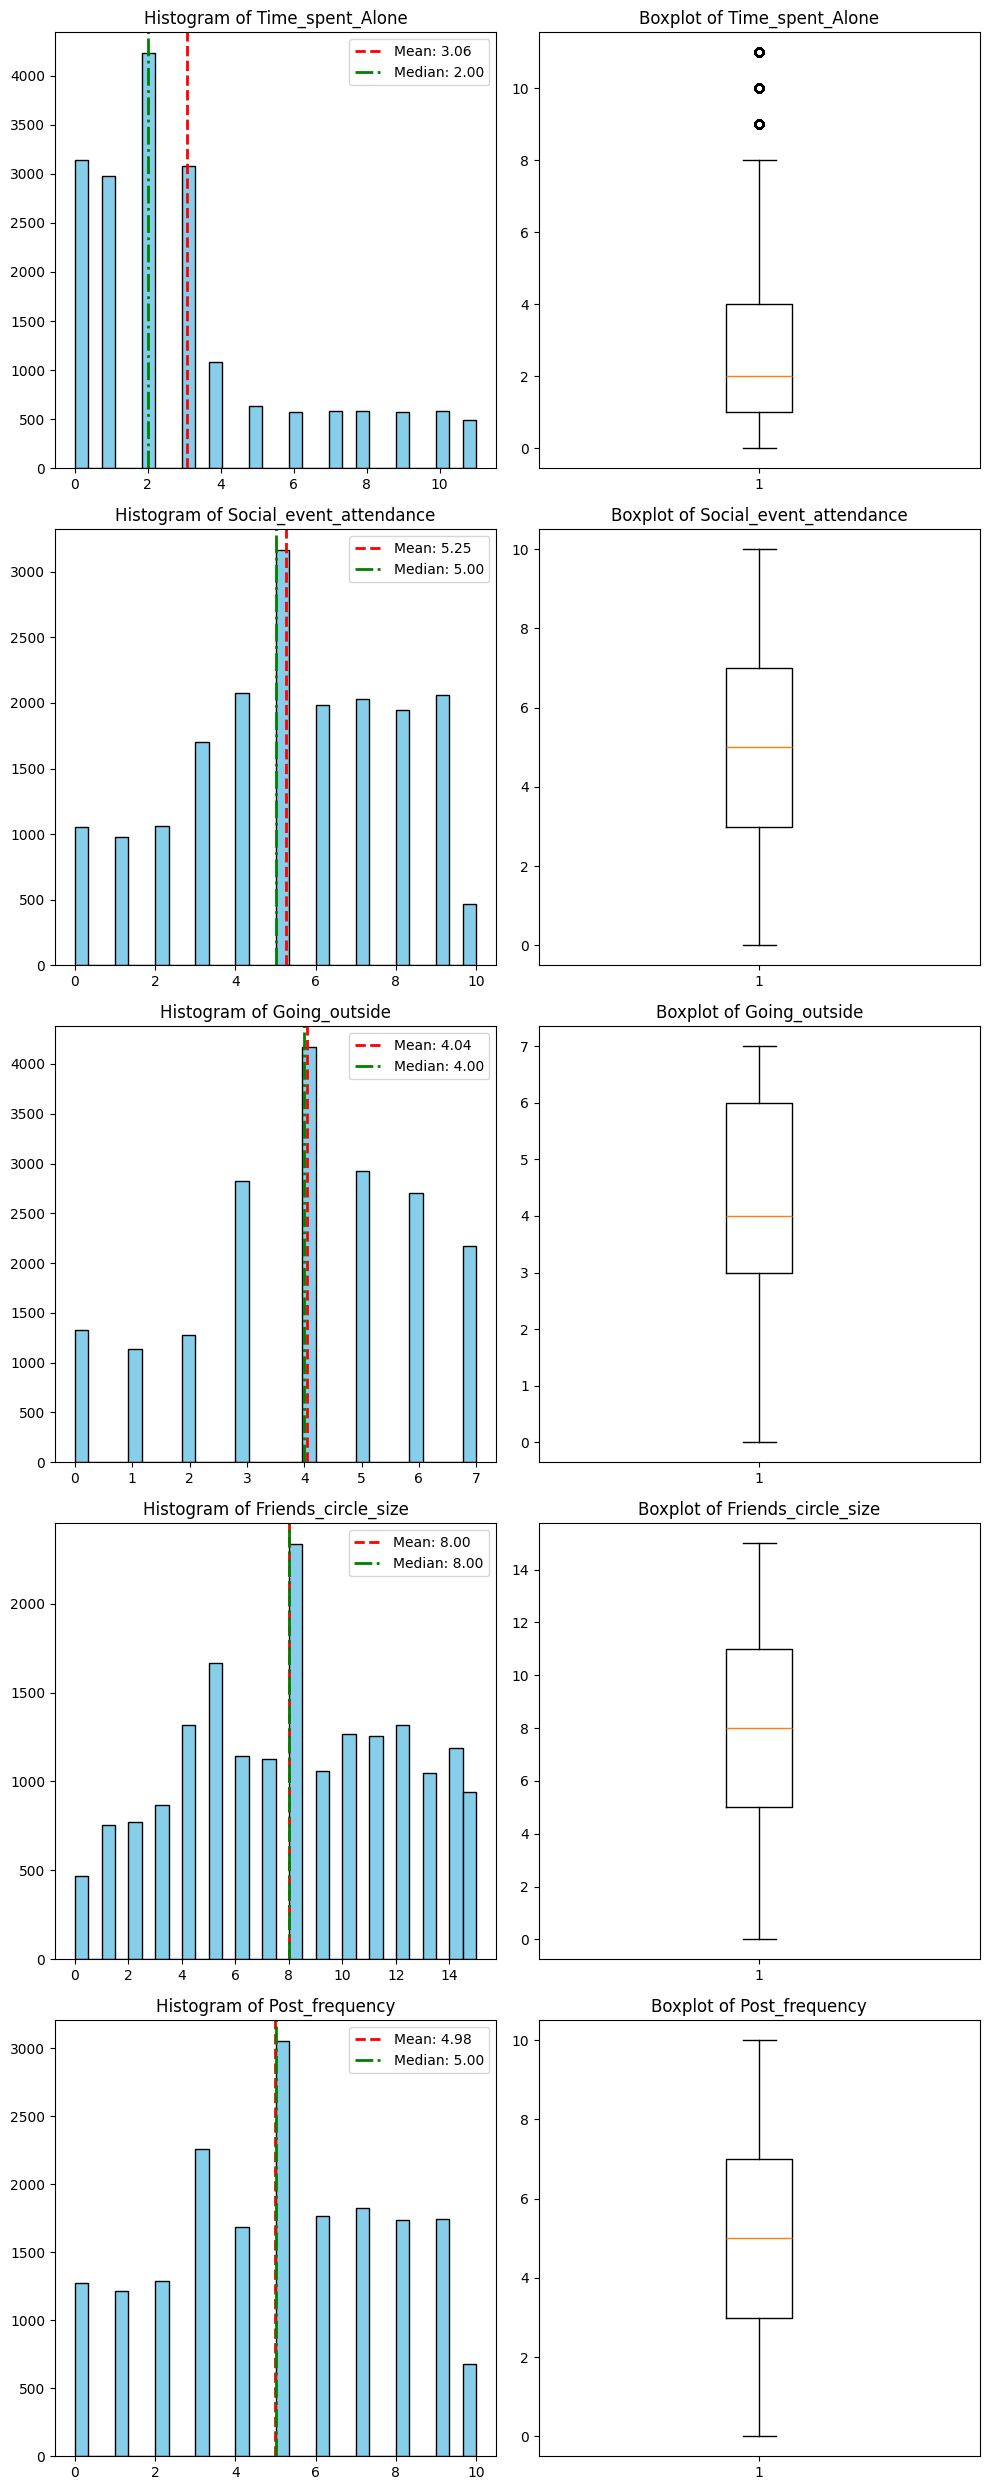

In [20]:

fig, axes = plt.subplots(len(num_feat), 2, figsize=(10, 5 * len(num_feat)))

for idx, col in enumerate(num_feat):
    # Histogram
    axes[idx, 0].hist(df[col], bins=30, color="skyblue", edgecolor="black")
    
    axes[idx, 0].set_title(f"Histogram of {col}")
    mean_val=df[col].mean()
    median_val = df[col].median()
    axes[idx, 0].axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Mean: {mean_val:.2f}")
    axes[idx, 0].axvline(median_val, color="green", linestyle="-.", linewidth=2, label=f"Median: {median_val:.2f}")
    axes[idx, 0].legend()
    # Boxplot
    axes[idx, 1].boxplot(df[col].dropna())  # dropna avoids issues with NaN
    axes[idx, 1].set_title(f"Boxplot of {col}")

plt.tight_layout()



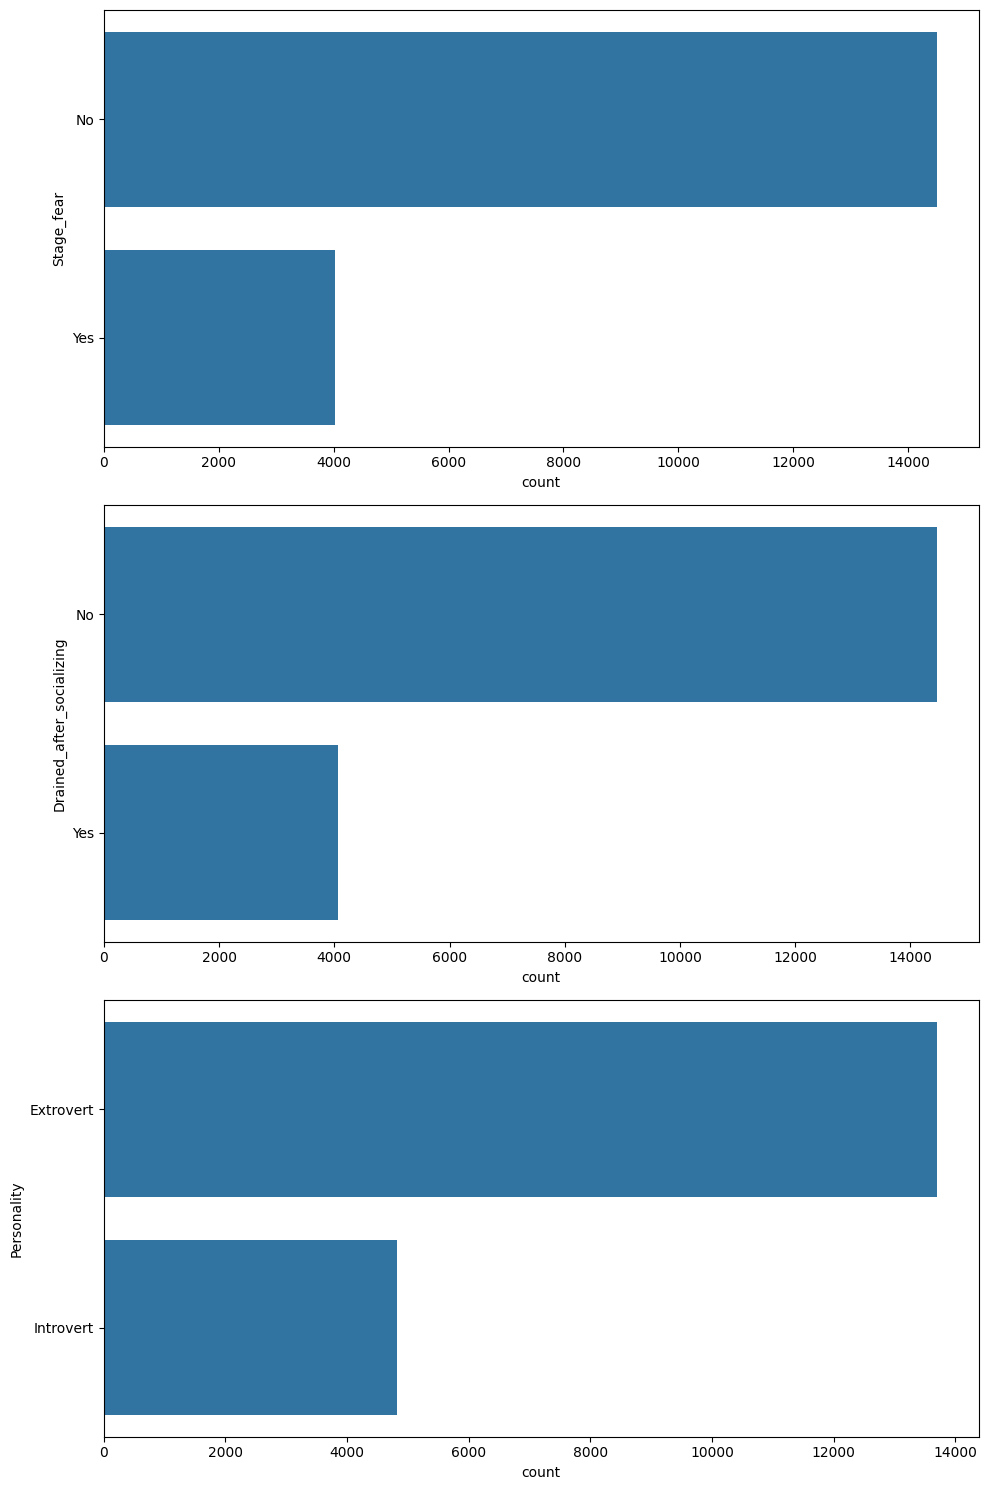

In [21]:

fig, axes = plt.subplots(len(cat_feat), 1, figsize=(10, 5 * len(cat_feat)))

for idx, col in enumerate(cat_feat):
    # Histogram
    sns.countplot(df[col],ax=axes[idx])

plt.tight_layout()



In [22]:
df.Personality.value_counts(normalize=True)

Personality
Extrovert    0.739527
Introvert    0.260473
Name: proportion, dtype: float64

imbalaced dataset

In [23]:
cat_feat.remove("Personality")

In [24]:
X = df[num_feat+cat_feat]
y=df.Personality

In [25]:
X

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing
0,0.0,6.0,4.0,15.0,5.0,No,No
1,1.0,7.0,3.0,10.0,8.0,No,No
2,6.0,1.0,0.0,3.0,0.0,Yes,No
3,3.0,7.0,3.0,11.0,5.0,No,No
4,1.0,4.0,4.0,13.0,5.0,No,No
...,...,...,...,...,...,...,...
18519,3.0,7.0,3.0,9.0,7.0,No,No
18520,1.0,6.0,7.0,6.0,5.0,No,No
18521,7.0,1.0,1.0,1.0,5.0,Yes,Yes
18522,2.0,1.0,0.0,5.0,2.0,Yes,Yes


In [26]:
from imblearn.over_sampling import RandomOverSampler

In [27]:
Xresample,yresample = RandomOverSampler().fit_resample(X,y)

In [28]:
yresample.shape

(27398,)

In [29]:

cat_data=pd.get_dummies(Xresample[cat_feat])


In [30]:
cat_data=cat_data.astype(int)

In [31]:
cat_data

,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,1,0,1,0
1,1,0,1,0
2,0,1,1,0
3,1,0,1,0
4,1,0,1,0
...,...,...,...,...
27393,1,0,1,0
27394,1,0,0,1
27395,0,1,1,0
27396,0,1,0,1


In [32]:
Xresample.drop(columns=cat_feat,inplace=True)

In [33]:
Xresample[cat_data.columns]=cat_data.values

In [34]:
Xresample

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,0.0,6.0,4.0,15.0,5.0,1,0,1,0
1,1.0,7.0,3.0,10.0,8.0,1,0,1,0
2,6.0,1.0,0.0,3.0,0.0,0,1,1,0
3,3.0,7.0,3.0,11.0,5.0,1,0,1,0
4,1.0,4.0,4.0,13.0,5.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
27393,1.0,6.0,5.0,15.0,9.0,1,0,1,0
27394,7.0,2.0,1.0,2.0,2.0,1,0,0,1
27395,5.0,2.0,0.0,4.0,2.0,0,1,1,0
27396,6.0,0.0,3.0,4.0,3.0,0,1,0,1


In [35]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [37]:
X_train,X_test,y_train,y_test = train_test_split(Xresample,yresample,test_size=0.3,random_state=42)

In [38]:
X_train.shape,X_test.shape

((19178, 9), (8220, 9))

In [39]:
scaler = StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.transform(X_test)

In [40]:
encoder=LabelEncoder()
y_train_encoded=encoder.fit_transform(y_train)
y_test_encoded=encoder.fit_transform(y_test)


In [41]:
svc = SVC(random_state=42).fit(X_train_norm,y_train_encoded)
ypred = svc.predict(X_test_norm)
print(confusion_matrix(y_test_encoded,ypred))
print(f'f1 = {f1_score(y_test_encoded,ypred)}')
print(f'accuracy = {accuracy_score(y_test_encoded,ypred)}')


[[4008   82]
 [ 271 3859]]
f1 = 0.9562631644158097
accuracy = 0.9570559610705596


In [42]:
from scipy.stats import reciprocal
param_dist = {
    "C": reciprocal(1e-3, 1e3),   # better than linspace (search log scale)
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "gamma": reciprocal(1e-4, 1e1),  # works better than uniform for wide ranges
    "degree": [2, 3, 4, 5],
    "class_weight": [None, "balanced"]
}
random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    n_iter=10,                 
    scoring="accuracy",         
    cv=3,                       
    verbose=2,
    n_jobs=1,
    random_state=30
)
random_search.fit(X_train_norm,y_train_encoded)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END C=7.325903883933699, class_weight=balanced, degree=3, gamma=0.20665195902698383, kernel=sigmoid; total time=   1.5s
[CV] END C=7.325903883933699, class_weight=balanced, degree=3, gamma=0.20665195902698383, kernel=sigmoid; total time=   0.9s
[CV] END C=7.325903883933699, class_weight=balanced, degree=3, gamma=0.20665195902698383, kernel=sigmoid; total time=   1.5s
[CV] END C=7.217239577224759, class_weight=balanced, degree=3, gamma=0.10008156686160613, kernel=rbf; total time=   3.0s
[CV] END C=7.217239577224759, class_weight=balanced, degree=3, gamma=0.10008156686160613, kernel=rbf; total time=   5.9s
[CV] END C=7.217239577224759, class_weight=balanced, degree=3, gamma=0.10008156686160613, kernel=rbf; total time=   3.7s
[CV] END C=0.02572452555183449, class_weight=balanced, degree=3, gamma=0.010800665302952345, kernel=sigmoid; total time=   1.7s
[CV] END C=0.02572452555183449, class_weight=balanced, degree=3, gamma=0.

RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a9e4d1e7440>,
                                        'class_weight': [None, 'balanced'],
                                        'degree': [2, 3, 4, 5],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a9e4583fe30>,
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=30, scoring='accuracy', verbose=2)

In [ ]:
random_search.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a9e4d1e7440>,
                                        'class_weight': [None, 'balanced'],
                                        'degree': [2, 3, 4, 5],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a9e4583fe30>,
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=30, scoring='accuracy', verbose=2)>

In [45]:
random_search.best_score_

0.9607885635891519

In [48]:
svc_tuned = random_search.best_estimator_
ypred = svc_tuned.predict(X_test_norm)
print(confusion_matrix(y_test_encoded,ypred))
print(f'f1 = {f1_score(y_test_encoded,ypred)}')
print(f'accuracy = {accuracy_score(y_test_encoded,ypred)}')

[[4002   88]
 [ 245 3885]]
f1 = 0.958904109589041
accuracy = 0.9594890510948905


In [62]:
rfc = RandomForestClassifier(random_state=42).fit(X_train_norm,y_train_encoded)
ypred = rfc.predict(X_test_norm)
print(confusion_matrix(y_test_encoded,ypred))
print(f'f1 = {f1_score(y_test_encoded,ypred)}')
print(f'accuracy = {accuracy_score(y_test_encoded,ypred)}')

[[3957  133]
 [  66 4064]]
f1 = 0.9761018373964213
accuracy = 0.9757907542579075


In [53]:
param_dist = {
    "n_estimators": np.random.randint(100, 1000,100),        # number of trees
    "max_depth": np.random.randint(3, 50,100),              # depth of each tree
    "min_samples_split": np.random.randint(2, 20,20),      # min samples to split an internal node
    "min_samples_leaf": np.random.randint(1, 20,20),       # min samples at a leaf node
    "max_features": ["sqrt", "log2", None],   # number of features to consider at split
    "bootstrap": [True, False],               # bootstrap samples
    "class_weight": [None, "balanced"]        # handle class imbalance
}
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=10,                 
    scoring="accuracy",         
    cv=3,                       
    verbose=2,
    n_jobs=1,
    random_state=30
)
random_search.fit(X_train_norm,y_train_encoded)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, class_weight=balanced, max_depth=43, max_features=None, min_samples_leaf=3, min_samples_split=11, n_estimators=232; total time=   3.7s
[CV] END bootstrap=True, class_weight=balanced, max_depth=43, max_features=None, min_samples_leaf=3, min_samples_split=11, n_estimators=232; total time=   2.9s
[CV] END bootstrap=True, class_weight=balanced, max_depth=43, max_features=None, min_samples_leaf=3, min_samples_split=11, n_estimators=232; total time=   3.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=19, max_features=None, min_samples_leaf=16, min_samples_split=6, n_estimators=280; total time=   4.7s
[CV] END bootstrap=False, class_weight=balanced, max_depth=19, max_features=None, min_samples_leaf=16, min_samples_split=6, n_estimators=280; total time=   4.6s
[CV] END bootstrap=False, class_weight=balanced, max_depth=19, max_features=None, min_samples_leaf=16, min_samples_split=6, n_estimators=

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'max_depth': array([22, 14, 46, 46, 32, 29, 24, 24, 16, 25,  9, 34, 32, 32,  9, 36,  8,
       30, 19, 12,  8, 26, 10,  9,  5, 43, 17, 30, 49, 48, 21, 32, 35, 44,
       37, 32, 46,  8, 46, 17,  6, 10, 31, 40, 36, 28, 19, 36, 11, 48,  5,
       35, 43, 42, 19,  6, 33, 10, 30, 37, 20, 21, 16, 39, 32...
       722, 396, 663, 351, 692, 491, 726, 903, 699, 968, 944, 931, 280,
       940, 617, 970, 152, 460, 399, 153, 321, 361, 372, 393, 787, 103,
       647, 988, 470, 705, 919, 504, 482, 711, 290, 138, 220, 913, 530,
       779, 522, 671, 565, 328, 932, 294, 310, 362, 119, 849, 377, 154,
       717, 712, 989, 101, 986, 672, 347, 176, 232, 720, 957, 367, 671,
       553, 986, 287, 355, 594, 482, 760, 276, 880, 138, 180, 758, 377,
       300, 830, 212, 363, 974, 367, 978, 117, 866])},
                   random_state=30, scoring='accuracy', verbose=2)

In [55]:
rfc_tuned=random_search.best_estimator_

In [56]:
ypred = rfc_tuned.predict(X_test_norm)
print(confusion_matrix(y_test_encoded,ypred))
print(f'f1 = {f1_score(y_test_encoded,ypred)}')
print(f'accuracy = {accuracy_score(y_test_encoded,ypred)}')

[[4005   85]
 [ 247 3883]]
f1 = 0.9590022227710546
accuracy = 0.9596107055961071


In [57]:
from xgboost import XGBClassifier

In [62]:
xgb = XGBClassifier(
    objective="binary:logistic", 
    eval_metric="logloss", 
    use_label_encoder=False,
    random_state=42
)

random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=50,          
    cv=5,
    scoring="accuracy",  
    random_state=42,
    n_jobs=1,
    verbose=1
)
random_search.fit(X_train_norm,y_train_encoded)

ypred = random_search.best_estimator_.predict(X_test_norm)
print(confusion_matrix(y_test_encoded,ypred))
print(f'f1 = {f1_score(y_test_encoded,ypred)}')
print(f'accuracy = {accuracy_score(y_test_encoded,ypred)}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[13:21:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "class_weight", "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

[13:21:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "class_weight", "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

[13:21:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "class_weight", "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

[13:21:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "class_weight", "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

[13:21:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "class_weight", "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

[13:21:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "class_weight", "min_samples_leaf", "min_samples_split",

[[3941  149]
 [  88 4042]]
f1 = 0.9715178464126908
accuracy = 0.9711678832116788


In [64]:
random_search.best_params_

{'n_estimators': 117,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 30,
 'class_weight': 'balanced',
 'bootstrap': False}

In [66]:
model =random_search.best_estimator_
ypred = model.predict(X_test_norm)
print(confusion_matrix(y_test_encoded,ypred))
print(f'f1 = {f1_score(y_test_encoded,ypred)}')
print(f'accuracy = {accuracy_score(y_test_encoded,ypred)}')

[[3941  149]
 [  88 4042]]
f1 = 0.9715178464126908
accuracy = 0.9711678832116788


In [67]:
stack_model=StackingClassifier(
    estimators=[
        ('svc',svc_tuned),
        ('xgb',model),
        ('rfc',rfc_tuned)

    ],
    final_estimator=RandomForestClassifier(random_state=1)
)

In [68]:
stack_model.fit(X_train_norm,y_train_encoded)

[13:31:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

[13:31:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

[13:31:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

[13:32:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

[13:32:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "class_weight", "max_features", "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

[13:32:01] WARNING: /workspace/src/learner.cc:740: 
Par

StackingClassifier(estimators=[('svc',
                                SVC(C=0.9773426906287916,
                                    class_weight='balanced', degree=2,
                                    gamma=2.1160594760802587,
                                    random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              bootstrap=False, callbacks=None,
                                              class_weight='balanced',
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,...
                                              max_delta_step=None, max_depth=30,
                                              max_features='log2',
                                              max_leaves=None,
                                              min_child_weight=None,
                                              min_samples_leaf=1,
                                              min_samples_split=10, missing=nan,
                                              monotone_constraints=None, ...)),
                               ('rfc',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=32,
                                                       min_samples_leaf=4,
                                                       min_samples_split=4,
                                                       n_estimators=932))],
                   final_estimator=RandomForestClassifier(random_state=1))

In [69]:
pred=stack_model.predict(X_test_norm)


In [70]:
print(confusion_matrix(y_test_encoded,pred))
print(f'f1 = {f1_score(y_test_encoded,pred)}')
print(f'accuracy = {accuracy_score(y_test_encoded,pred)}')

[[3952  138]
 [  95 4035]]
f1 = 0.9719378537877875
accuracy = 0.9716545012165451


In [71]:
xgb = XGBClassifier(
    random_state=42
)

xgb.fit(X_train_norm,y_train_encoded)

ypred = xgb.predict(X_test_norm)
print(confusion_matrix(y_test_encoded,ypred))
print(f'f1 = {f1_score(y_test_encoded,ypred)}')
print(f'accuracy = {accuracy_score(y_test_encoded,ypred)}')

[[3991   99]
 [ 227 3903]]
f1 = 0.9599114608952287
accuracy = 0.9603406326034063


Random forest is the best model for this dataset 